# Rosenbrock Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim
from torch import tensor

In [71]:
a = 1.0
b = 1.0 # 1: easy; 100 : hard

def f(x, y):
    return (a - x)**2 + b*(y-x**2)**2

# Minimum: (a, a**2) = (1.0, 1.0), value 0.0

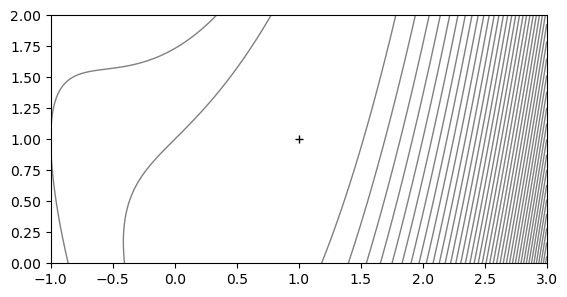

In [72]:
def contour():
    x = np.linspace(-1.0, 3.0, 200)
    y = np.linspace(0.0, 2.0, 200)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    cs = plt.contour(X, Y, Z, levels=50, colors="grey", linewidths=1.0)
    plt.plot(1,1, "k+",)
    #axis = plt.gca()
    #axis.clabel(cs, inline=True, fontsize=10)
    #plt.colorbar()
    plt.gca().set_aspect(1.0)
    
contour()

In [73]:
x = tensor(0.0, requires_grad=True)
y = tensor(0.0, requires_grad=True)

In [74]:
optimizer = torch.optim.SGD([x, y], lr=0.1)

In [75]:
x.data = tensor(2.0)
y.data = tensor(1.0)
z = f(x, y)
xs, ys, zs = [x.item()], [y.item()], [z.item()]
for i in range(100):
    z = f(x, y)
    z.backward()
    optimizer.step()
    xs.append(x.item())
    ys.append(y.item())
    zs.append(z.item())
    x.grad.zero_()
    y.grad.zero_()
print(xs[-1], ys[-1], zs[-1])


0.9908132553100586 0.9778799414634705 0.00010634052887326106


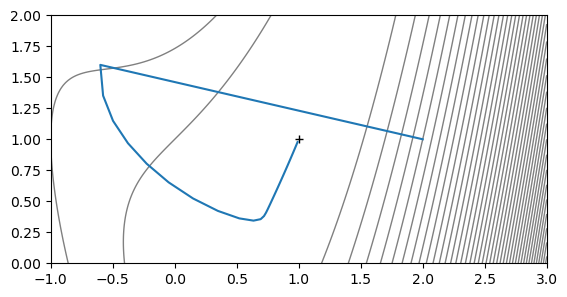

In [77]:
contour()
plt.plot(xs, ys, color="C0")
_

In [12]:
xs = np.array(xs)
ys = np.array(ys)
error = np.sqrt((xs-1.0)**2 + (ys-1.0)**2)
error

array([1.        , 0.7621653 , 0.6244461 , ..., 0.00685268, 0.00685241,
       0.00685215], dtype=float32)

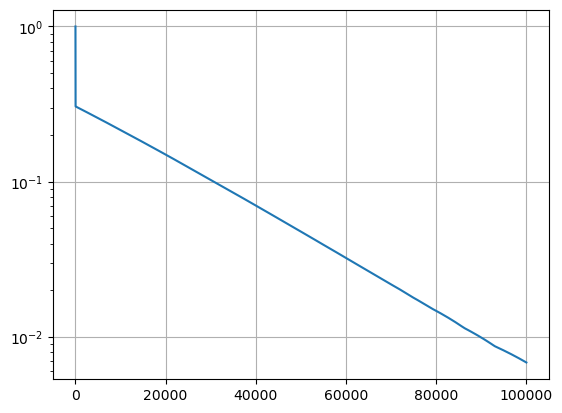

In [21]:
plt.semilogy(error)
plt.grid(True)
None

In [22]:
# TODO: tweak the optimizer parameters, try the other optimizers.